WEST US

OpenAI Version: 0.27.4

In [58]:
import datetime
import openai
import os
import base64
import requests
import json
import sys

from dotenv import load_dotenv
from IPython.display import Image

In [59]:
load_dotenv()

# Azure Open AI
openai.api_type: str = "azure"
openai.api_key = os.getenv("AZURE_OAI_KEY_GPT4V")
openai.api_base = os.getenv("AZURE_OAI_ENDPOINT_GPT4V")
openai.api_version = os.getenv("OPENAI_API_VERSION")

In [60]:
model = "gpt-vision"

a = os.getenv("AZURE_OAI_ENDPOINT_GPT4V");



In [61]:
def gpt4V(image_file, query):
    """
    GPT4-Vision
    """
    # Endpoint
    base_url = f"{openai.api_base}/openai/deployments/{model}"
    print (base_url)
    endpoint = f"{base_url}/chat/completions?api-version=2023-12-01-preview"

    # Header
    headers = {"Content-Type": "application/json", "api-key": openai.api_key}

    # Encoded image
    base_64_encoded_image = base64.b64encode(open(image_file, "rb").read()).decode(
        "ascii"
    )

    # Prompt
    data = {
        "messages": [
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": [query, {"image": base_64_encoded_image}]},
        ],
        "max_tokens": 4000,
    }

    # Results
    response = requests.post(endpoint, headers=headers, data=json.dumps(data))

    if response.status_code == 200:
        result = json.loads(response.text)["choices"][0]["message"]["content"]
        return result
    
    if response.status_code == 429:
        print("[ERROR] Too many requests. Please wait a couple of seconds and try again.")
    
    else:
        print("[ERROR] Error code:", response.status_code)

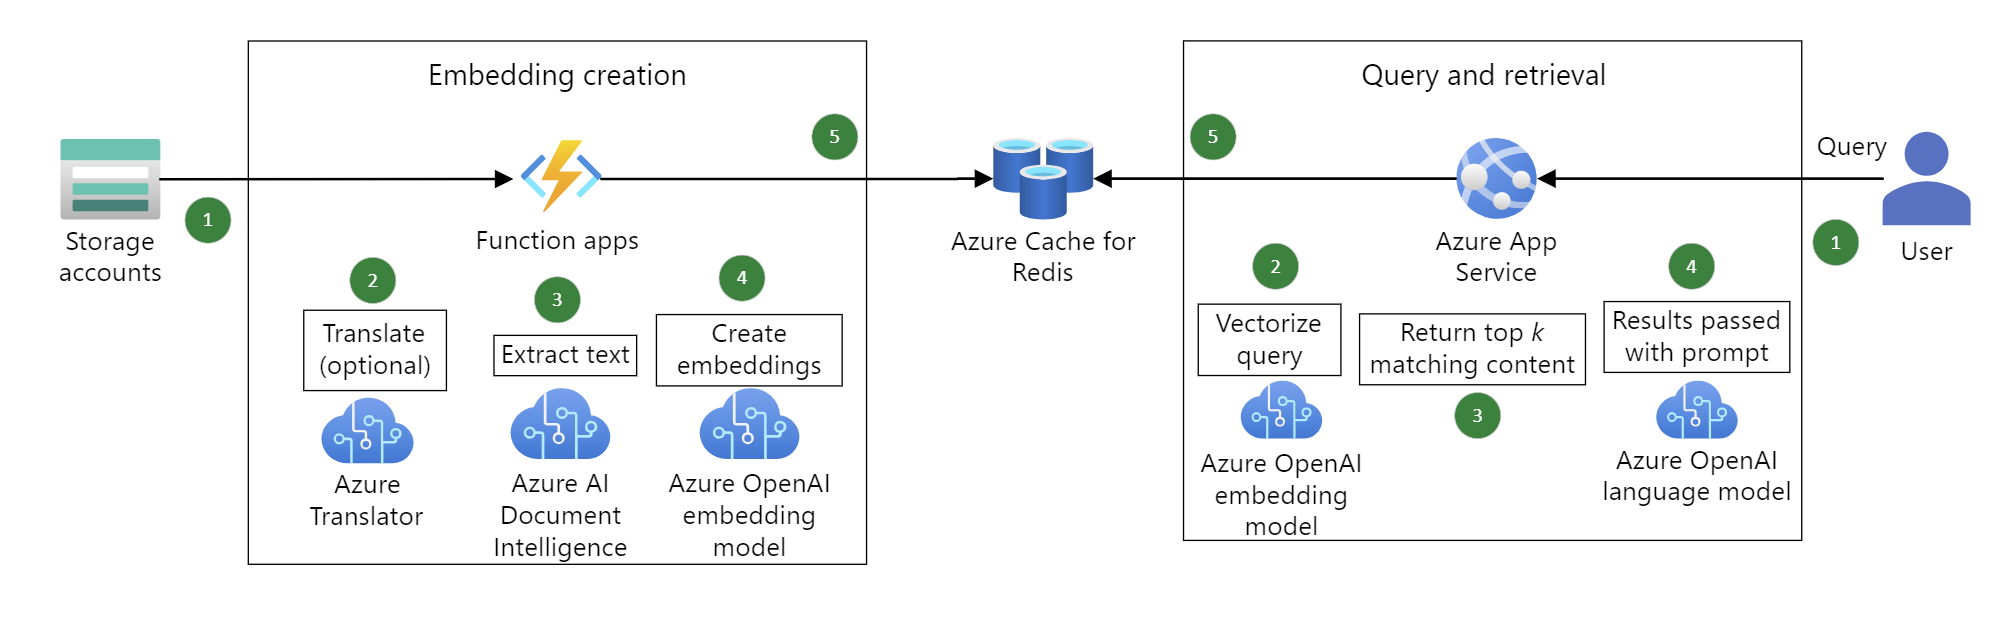

In [62]:
imagefile = "arquitectura.png"

Image(filename=imagefile)

In [63]:
result = gpt4V(imagefile, "explain the image")

print(result)

https://openaiallplatzi.openai.azure.com/openai/deployments/gpt-vision


[ERROR] Too many requests. Please wait a couple of seconds and try again.
None


In [64]:
result = gpt4V(imagefile, "explain the image")
print(result)
result = gpt4V(imagefile, "explain the image")
print(result)
result = gpt4V(imagefile, "explain the image")
print(result)

https://openaiallplatzi.openai.azure.com/openai/deployments/gpt-vision
[ERROR] Too many requests. Please wait a couple of seconds and try again.
None
https://openaiallplatzi.openai.azure.com/openai/deployments/gpt-vision
[ERROR] Too many requests. Please wait a couple of seconds and try again.
None
https://openaiallplatzi.openai.azure.com/openai/deployments/gpt-vision
This image describes a data flow process for text data embedding creation and query retrieval using Azure cloud services. The process is split into two main parts: "Embedding creation" and "Query and retrieval."

**Embedding creation:**

1. Data starts in **Storage accounts**, where text data is held.
2. **Function apps** serve as the interface for data processing through two steps:
    - **Translate (optional)**: This is done using **Azure Translator** if translation is necessary for the text data.
    - **Extract text**: **Azure AI Document Intelligence** is used to extract text from the data.
3. The extracted text is p